### Modeling KNN Regression

- KNN
- Visuals

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm
#import warnings
#warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
np.random.seed(42)

### Gridsearch with K-Neighbors Model

#### Import Data

In [3]:
features_df = pd.read_csv('../data/tvec_df.csv')

In [4]:
features_df.head()

,11,12,15,2018,39a,40,air,air force,amp,apollo,...,time,today,twitter,vab,vehicle,video,view,year,years,subreddit
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
1,0.0,0.0,0.0,0.868537,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.387832,0.0,0.0,0.0,0.0,0.476247,0.0,spacex
4,0.0,0.0,0.0,0.000000,0.0,0.307456,0.0,0.0,0.0,0.0,...,0.304733,0.0,0.267847,0.0,0.0,0.0,0.0,0.000000,0.0,spacex


In [5]:
features_df['subreddit'].value_counts()

nasa      1227
spacex    1221
Name: subreddit, dtype: int64

#### Setup X and y

In [6]:
features_df['y'] = [1 if i == 'spacex' else 0 for i in features_df['subreddit']]

In [7]:
X = features_df.drop(['subreddit', 'y'], axis=1)
y = features_df['y']

#### Train / Test / Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#### Instaniate the Model and Setup Parameters

In [9]:
knn = KNeighborsClassifier()

In [10]:
cross_val_score(knn, X_train, y_train).mean()

0.8491211529435287

In [11]:
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [12]:
gs = GridSearchCV(knn, param_grid=params)

In [13]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
gs.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [16]:
gs.score(X_train, y_train)

0.9509803921568627

In [17]:
gs.score(X_test, y_test)

0.8905228758169934

In [18]:
gs.grid_scores_

[mean: 0.84368, std: 0.00647, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.85730, std: 0.00402, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.84913, std: 0.00559, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.86111, std: 0.00410, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.83987, std: 0.00946, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.85675, std: 0.01242, params: {'n_neighbors': 7, 'weights': 'distance'}]

In [19]:
pred_gs = gs.predict(X_test)

In [20]:
con_mat = confusion_matrix(y_test, pred_gs)
con_mat

array([[297,  10],
       [ 57, 248]])

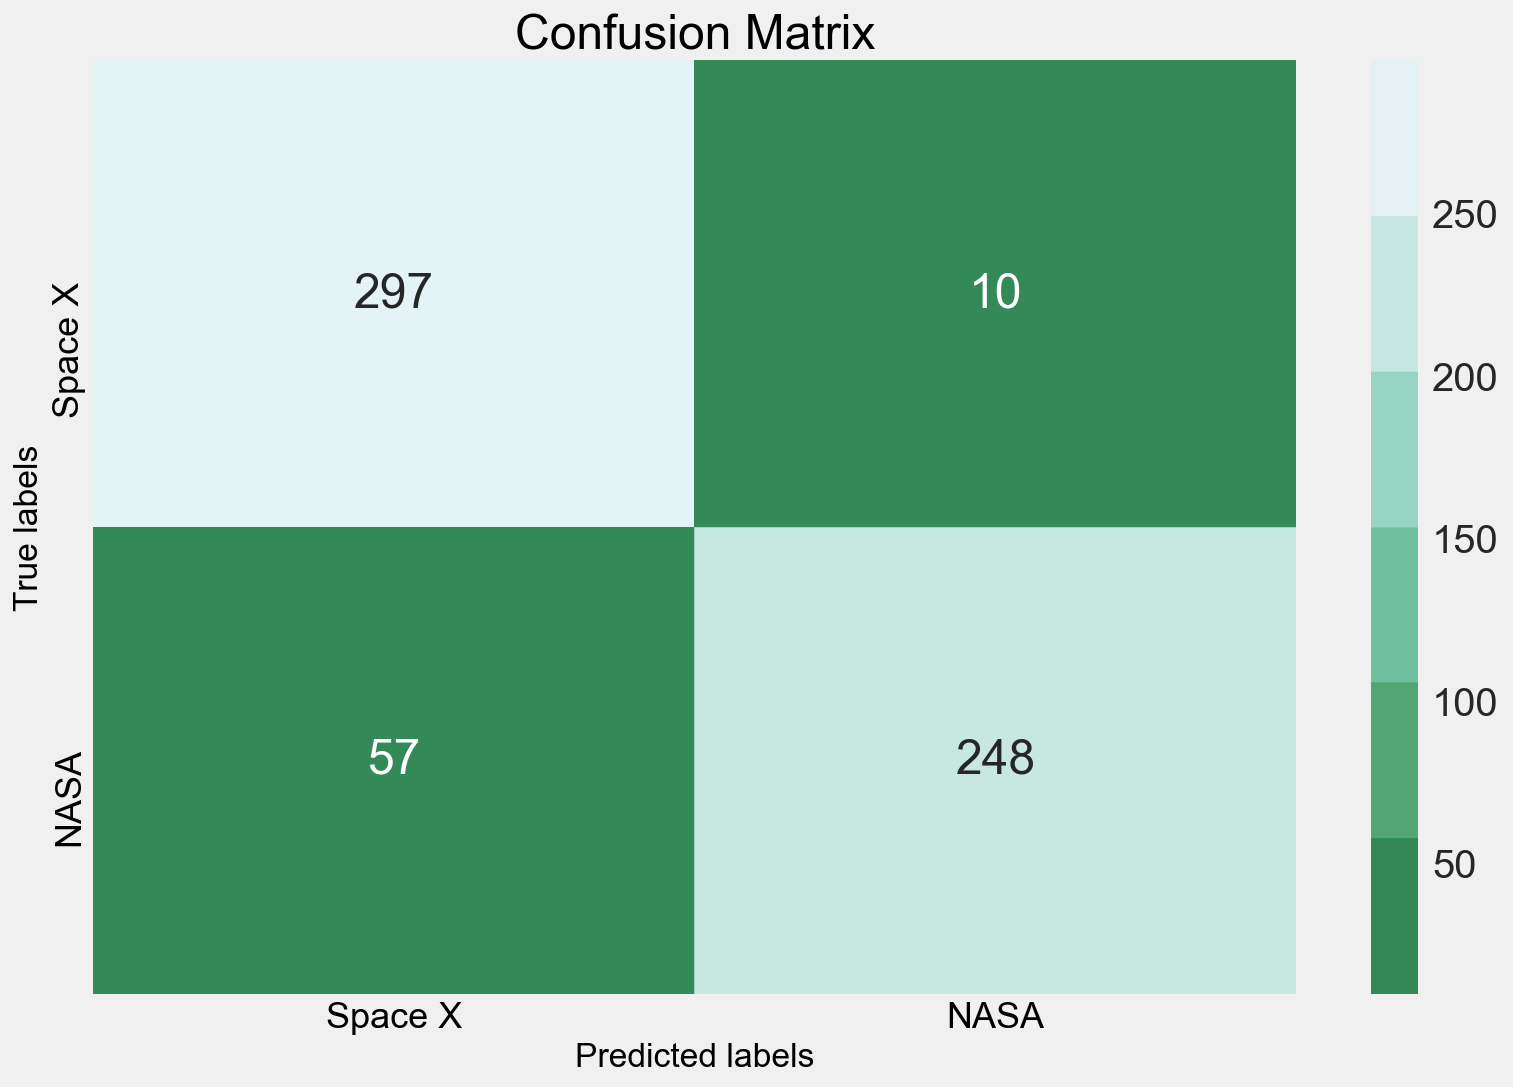

In [21]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.set(font_scale=2)
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
cmap = sns.color_palette("BuGn_r")
sns.heatmap(con_mat, annot=True, cmap=cmap, fmt='g', alpha=.8);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Space X', 'NASA']); 
ax.yaxis.set_ticklabels(['Space X', 'NASA']);